# <center>Assessment CLO-3: Tugas Pemrograman Learning</center>

<b>Topik</b>
[Klasifikasi/Regresi] pada [nama dataset] menggunakan [nama metode]]

<b>Kelompok: </b>

Anggota:
1. Nama - NIM
2. Nama - NIM
3. Nama - NIM

#### Pendahuluan
Silahkan double click cell ini dan perkenalkan dataset yang Anda pilih, beserta masalah apa yang ingin diselesaikan!

Jelaskan pula bagaimana Anda mengolah data serta membaginya untuk tahap training dan testing!

In [ ]:
# Show your data in tabular or other visualization ways
# Data Preprocessing
# Data Splitting
# Write your code here



In [1]:
from ucimlrepo import fetch_ucirepo, list_available_datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

list_available_datasets()

-------------------------------------
The following datasets are available:
-------------------------------------
Dataset Name                                                                            ID    
------------                                                                            --    
Abalone                                                                                 1     
Adult                                                                                   2     
Annealing                                                                               3     
Audiology (Standardized)                                                                8     
Auto MPG                                                                                9     
Automobile                                                                              10    
Balance Scale                                                                           12    
Balloons                       

In [2]:
abalone_dataset = fetch_ucirepo('Abalone')

x = abalone_dataset.data.features
y = abalone_dataset.data.targets

In [3]:
x = x.dropna()

In [4]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole_weight    4177 non-null   float64
 5   Shucked_weight  4177 non-null   float64
 6   Viscera_weight  4177 non-null   float64
 7   Shell_weight    4177 non-null   float64
dtypes: float64(7), object(1)
memory usage: 261.2+ KB


In [5]:
x.describe()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000


In [6]:
x.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055


In [7]:
y.head()

,Rings
0,15
1,7
2,9
3,10
4,7


<Axes: >

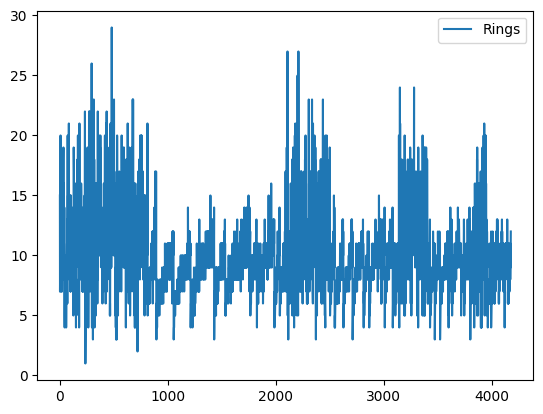

In [8]:
y.plot()

<Axes: >

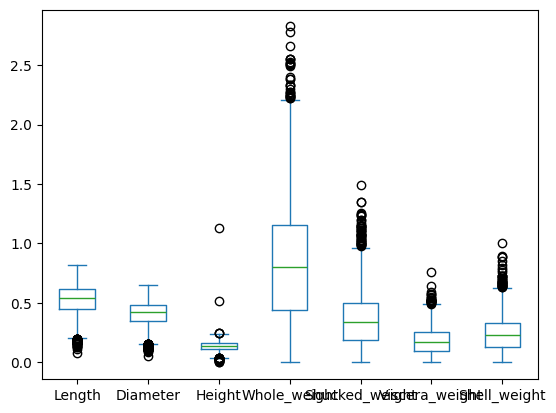

In [9]:
x.plot(kind='box')

In [10]:
x = x.sample(frac=1, random_state=42).reset_index(drop=True)
y = y.sample(frac=1, random_state=42).reset_index(drop=True)

In [11]:
number_of_folds = 5
number_per_folds = len(x)

fold_split_index = []

for i in range(number_of_folds):
    start_index = number_per_folds * i 
    end_index = start_index + number_per_folds
    val_index = np.arange(start_index, end_index)

    mask = ~np.isin(x.index, val_index)
    train_index = x.index[mask]

    fold_split_index.append((train_index, val_index))

In [12]:
for train_index, val_index in fold_split_index:
    print(f'val start index: {val_index.min()}')

val start index: 0
val start index: 4177
val start index: 8354
val start index: 12531
val start index: 16708


In [13]:
class KNNRegressor:
    def __init__(self, n_neighbors=5):
        self.n_neighbors = n_neighbors
        self.X_train = None
        self.y_train = None
    
    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        y_pred = [self._predict_one(x) for x in X]
        return np.array(y_pred)
    
    def _predict_one(self, x):
        distances = np.linalg.norm(self.X_train - x, axis=1)
        nearest_indices = distances.argsort()[:self.n_neighbors]
        nearest_labels = self.y_train[nearest_indices]
        return nearest_labels.mean()

        

In [14]:
from sklearn.metrics import mean_squared_error, r2_score

In [26]:
model = KNNRegressor()

x = x.dropna()
y = y.dropna()

total_MSE = 0
total_r2 = 0 

for i, (train_index, val_index) in enumerate(fold_split_index):
    x_train_fold = x.iloc[train_index].reset_index(drop=True)
    y_train_fold = y.iloc[train_index].reset_index(drop=True)

    x_val_fold = x.iloc[val_index].reset_index(drop=True)
    y_val_fold = y.iloc[val_index].reset_index(drop=True)

    model.fit(x_train_fold.values, y_train_fold.values)

    y_pred = model.predict(x_val_fold.values)

    print(y_val_fold)
    print(y_pred)

    r2 = r2_score(y_val_fold, y_pred) * 100
    mse = mean_squared_error(y_val_fold, y_pred) * 100

    total_r2 += r2
    total_MSE += mse

    print(f'nilai mse fold ke-{i+1}\t: {mse}%')
    print(f'skor r2 fold ke-{i+1}\t: {r2}')
    print()

    print('\nrata-rata mse: ', total_r2 / number_of_folds)
    print('\nrata rata r2: ', total_MSE / number_of_folds)

C:\Users\rafly\AppData\Local\Temp\ipykernel_14576\1486867708.py:19: RuntimeWarning: Mean of empty slice.
  return nearest_labels.mean()
C:\Users\rafly\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


      Rings
0         9
1         8
2        16
3         9
4        14
...     ...
4172      9
4173     12
4174     11
4175      9
4176      6

[4177 rows x 1 columns]
[nan nan nan ... nan nan nan]


ValueError: Input contains NaN.

In [25]:
x.isnull().sum()


Sex               0
Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
dtype: int64

In [24]:
y.isnull().sum()

Rings    0
dtype: int64

#### Metode yang Digunakan
Silahkan double click cell ini dan jelaskan metode yang Anda pilih, disertai penjelasan mengenai setting parameter yang ditentukan!

In [ ]:
# Experiment Settings
# Write your code here



In [ ]:
# Model Training
# Save the trained model
# Write your code here



In [ ]:
# Model Testing and Evaluation
# Show the performance
# Write your code here



#### Hasil dan Analisis
Silahkan double click cell ini dan tulis hasil dan analisis!

Tampilkan performa yang dihasilkan, bisa dalam tabel dan grafik, diukur berdasarkan metrik evaluasi yang dipakai.

Tuliskan hasil analisis Anda.

#### Kesimpulan
Silahkan double click cell ini dan tulis kesimpulan berdasarkan hasil percobaan yang Anda lakukan!